# COVID-19 Analysis

This short report analyzes some of the data from the [repository by Johns Hopkins CCSE](https://github.com/CSSEGISandData/COVID-19) related to the COVID-19 pandemic.

## Preliminaries

We have developed a simple Python module  with a set of functions that can be used to visualize the available data. The module is available in the repository ([hedera_covid.py](hedera_covid.py)), the data as well.
We periodically update the datasets with those available online.

In [1]:
import numpy as np
from hedera_covid import DataHandler, plot_death_rate, plot_daily_cases, plot_confirmed_cases

path_confirmed = '~/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_death = '~/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'



First of all, we create an object of type `DataHandler`. This class can be used to perform internally operation on the dataset, so that data are afterwards ready and clean for plotting.

In [2]:
covid_data = DataHandler(data_confirmed_path = path_confirmed,
                         data_death_path = path_death)

covid_data.confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


## Initialize list of countries

Now, it is possible to get data of a country to the list that we want to look at. This can be done using

    my_country = covid_data.get_country('Name of the country')

The `Name of the country` is the name given in the third column (`Country/Region`) of the `covid_data` dataframe.

For example:

In [3]:
italy = covid_data.get_country('Italy')


This create a dictionary with the following keys:

In [4]:
italy.keys()

dict_keys(['name', 'dates', 'confirmed', 'deaths', 'daily_new_cases', 'daily_deaths', 'start'])

We can also use
    `covid_data.add_country('Name of the country')`
    
to fill a list of countries that we can later analyze together.



In [5]:
my_countries = ['Italy','Spain','Germany','Austria','France','United Kingdom','US','Sweden','Netherlands']

for c in my_countries:
    covid_data.add_country(c)

### Remark

We can also load at once all available countries.

For this, we will first create a new handler (so that we do not mix up data):

In [11]:
# create first a new handler
covid_data_full = DataHandler(data_confirmed_path = path_confirmed,
                              data_death_path = path_death)

    
    

Now, we can get all names. Note that we have to use `np.unique` since there are countries that appear multiple times
(this is how JHU stored the data)

In [12]:
# now get all names
all_country_names = covid_data.confirmed['Country/Region']
all_country_names = np.unique(all_country_names)
for n in all_country_names:
    covid_data_full.add_country(n)

## Number of confirmed cases 

### Daily variation

The following figure shows the number of confirmed cases. Note that this is extremely dependent on the different testing 
protocols and capacity of different countries.

For this, we can use the function

    plot_daily_cases(countries,start_date,n_smooth,rescale)

Parameters:
* `countries`: a list of countries
* `start_date`: day where the plot start (0 = January 22)
* `n_smooth`: smoothing of the data (data will be averaged over `n_smooth` days, 7 is usually good)
* `rescale`: set `True` if you want to rescale curves to the same *start*. In this case `start_date` won't be used.

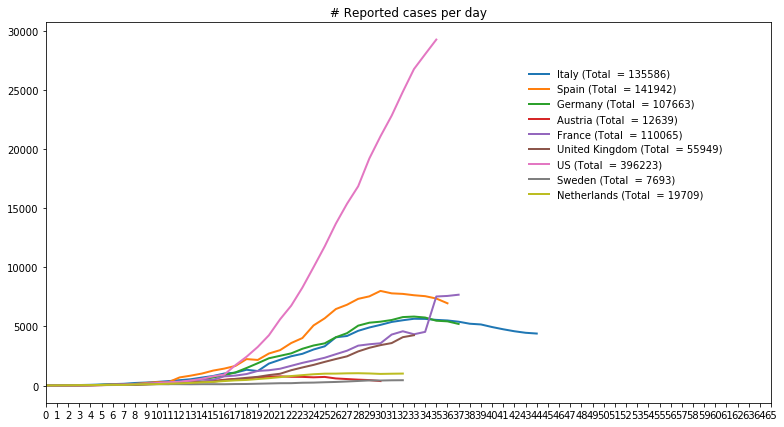

In [13]:
plot_daily_cases(covid_data.countries,start_date=0,n_smooth=7,rescale=True)

### Total cases (reported)

We can look at the total number of cases using the function

    plot_confirmed_cases(countries,start_date,n_smooth,rescale)
    
Parameters:
* `countries`: a list of countries
* `start_date`: day where the plot start (0 = January 22)
* `n_smooth`: smoothing of the data (data will be averaged over `n_smooth` days, 7 is usually good)
* `rescale`: set `True` if you want to rescale curves to the same *start*. In this case `start_date` won't be used.
* `log_scale`: set to `True` to scale use logarithmic scale for the *y*-axis
    

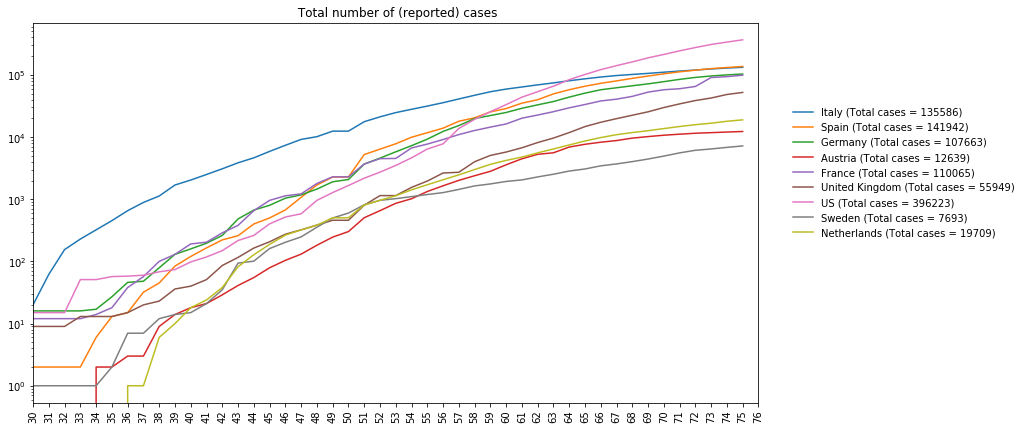

In [14]:
plot_confirmed_cases(covid_data.countries,start_date=30,n_smooth=0,rescale=False,log_scale=True)

## Mortality Rate

We can look at the official mortality rate over time for a selected set of countries

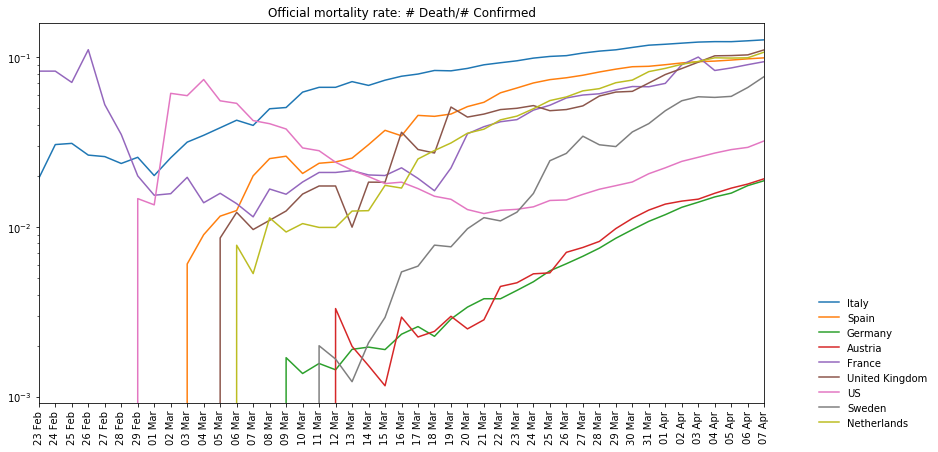

In [15]:
plot_death_rate(covid_data.countries,start_date = 32)

# Number of confirmed cases 

The following figure shows the number of confirmed cases. Note that this is extremely dependent on the different testing 
protocols and capacity of different countries.

Use:

* `start_date` to start plotting from a particular day (later than January 22)
* `n_smooth` to smooth the data (7 is usually good)
* `rescale` if you want to rescale curves to the same *start*. In this case `start_date` won't be used.

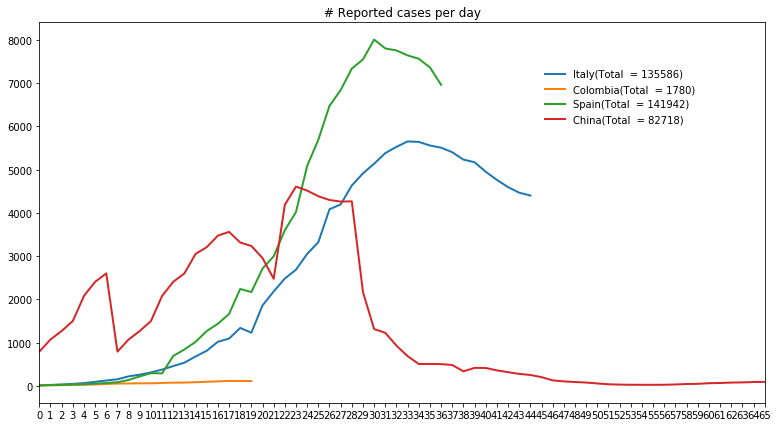

In [6]:
plot_daily_cases([italy,colombia,spain,china],start_date=0,n_smooth=7,rescale=True)